In [1]:
import json
import pandas as pd
import numpy as np
from os.path import join
from datasets.DatasetFactory import DatasetFactory
from moStress.preprocessing.MoStressPreprocessing import MoStressPreprocessing
from moStress.neuralNetwork.MoStressNeuralNetwork import MoStressNeuralNetwork
from moStress.neuralNetwork.modelHandler.EvaluateModel import EvaluateModel

In [2]:
wesadDataPath =  join("data", "WESAD")
datasetJsonFilePath = join("configs", "wesadDatasetOptions.json")
moStressJsonFilePath = join("configs","moStressConfigs.json")

In [3]:
with open(datasetJsonFilePath, 'r') as j:
        wesadOptions = json.loads(j.read())

with open(moStressJsonFilePath, 'r') as j:
        moStressConfigs = json.loads(j.read())

In [4]:
wesadChestPhysioData = DatasetFactory().make( "Wesad Physio Chest Data", wesadDataPath, wesadOptions["Chest Physio Data"] )

In [5]:
moStressPreprocessing = MoStressPreprocessing(moStressConfigs, wesadChestPhysioData.data)

In [6]:
moStressPreprocessing.execute()

Starting MoStress data preprocessing.

Data Normalization in progress...

Normalization finished.

Windows Labelling in progress...

Windows Labelling finished.

Weights Calculation in progress...

Weights Calculation finished.

MoStress data preprocessing finished.



In [7]:
dataset = {
    "features": moStressPreprocessing.features,
    "targets": moStressPreprocessing.targets,
    "weights": moStressPreprocessing.weights
}

In [8]:
moStressNeuralNetwork = MoStressNeuralNetwork(moStressConfigs, dataset)

2022-08-30 13:55:43.118418: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Starting MoStress with model architecture: REGULARIZER-LSTM and optimizer: rmsprop.


Creating model: REGULARIZER-LSTM

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 420, 128)          68608     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 420, 128)          0         
_________________________________________________________________
gaussian_noise (GaussianNois (None, 420, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 420, 128)          0         
_________________________________________________________________
flatten (Flatten)            (None, 53760)             0         
_________________________________________________________________
dense (Dense)                (None, 3)                 161283    
__

2022-08-30 13:57:34.533679: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-08-30 13:57:34.533695: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2022-08-30 13:57:34.535913: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.


Epoch 1/100
   1/3930 [..............................] - ETA: 4:55:20 - loss: 1.2691 - sparse_categorical_accuracy: 0.3750

2022-08-30 13:57:39.465326: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-08-30 13:57:39.465360: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.


   2/3930 [..............................] - ETA: 35:25 - loss: 1.3936 - sparse_categorical_accuracy: 0.4062  

2022-08-30 13:57:39.935773: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-08-30 13:57:40.208419: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.
2022-08-30 13:57:40.483323: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/REGULARIZER-LSTM/rmsprop/fit/20220830-135734/train/plugins/profile/2022_08_30_13_57_40

2022-08-30 13:57:40.671890: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/REGULARIZER-LSTM/rmsprop/fit/20220830-135734/train/plugins/profile/2022_08_30_13_57_40/C02D602YMD6Q.trace.json.gz
2022-08-30 13:57:40.827927: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/REGULARIZER-LSTM/rmsprop/fit/20220830-135734/train/plugins/profile/2022_08_30_13_57_40

2022-08-30 13:57:40.828205: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for mem

3930/3930 [==============================] - 1679s 426ms/step - loss: 1.3298 - sparse_categorical_accuracy: 0.7909 - val_loss: 0.1410 - val_sparse_categorical_accuracy: 0.9774

Epoch 00001: saving model to tranningCheckpoint/REGULARIZER-LSTM/rmsprop/cp.ckpt
Epoch 2/100
3930/3930 [==============================] - 1602s 408ms/step - loss: 0.5288 - sparse_categorical_accuracy: 0.9563 - val_loss: 0.2846 - val_sparse_categorical_accuracy: 0.9785

Epoch 00002: saving model to tranningCheckpoint/REGULARIZER-LSTM/rmsprop/cp.ckpt
Epoch 3/100
3930/3930 [==============================] - 1540s 392ms/step - loss: 0.2511 - sparse_categorical_accuracy: 0.9830 - val_loss: 0.0393 - val_sparse_categorical_accuracy: 0.9975

Epoch 00003: saving model to tranningCheckpoint/REGULARIZER-LSTM/rmsprop/cp.ckpt
Epoch 4/100
3930/3930 [==============================] - 1474s 375ms/step - loss: 0.1937 - sparse_categorical_accuracy: 0.9892 - val_loss: 0.0341 - val_sparse_categorical_accuracy: 0.9987

Epoch 00004: 

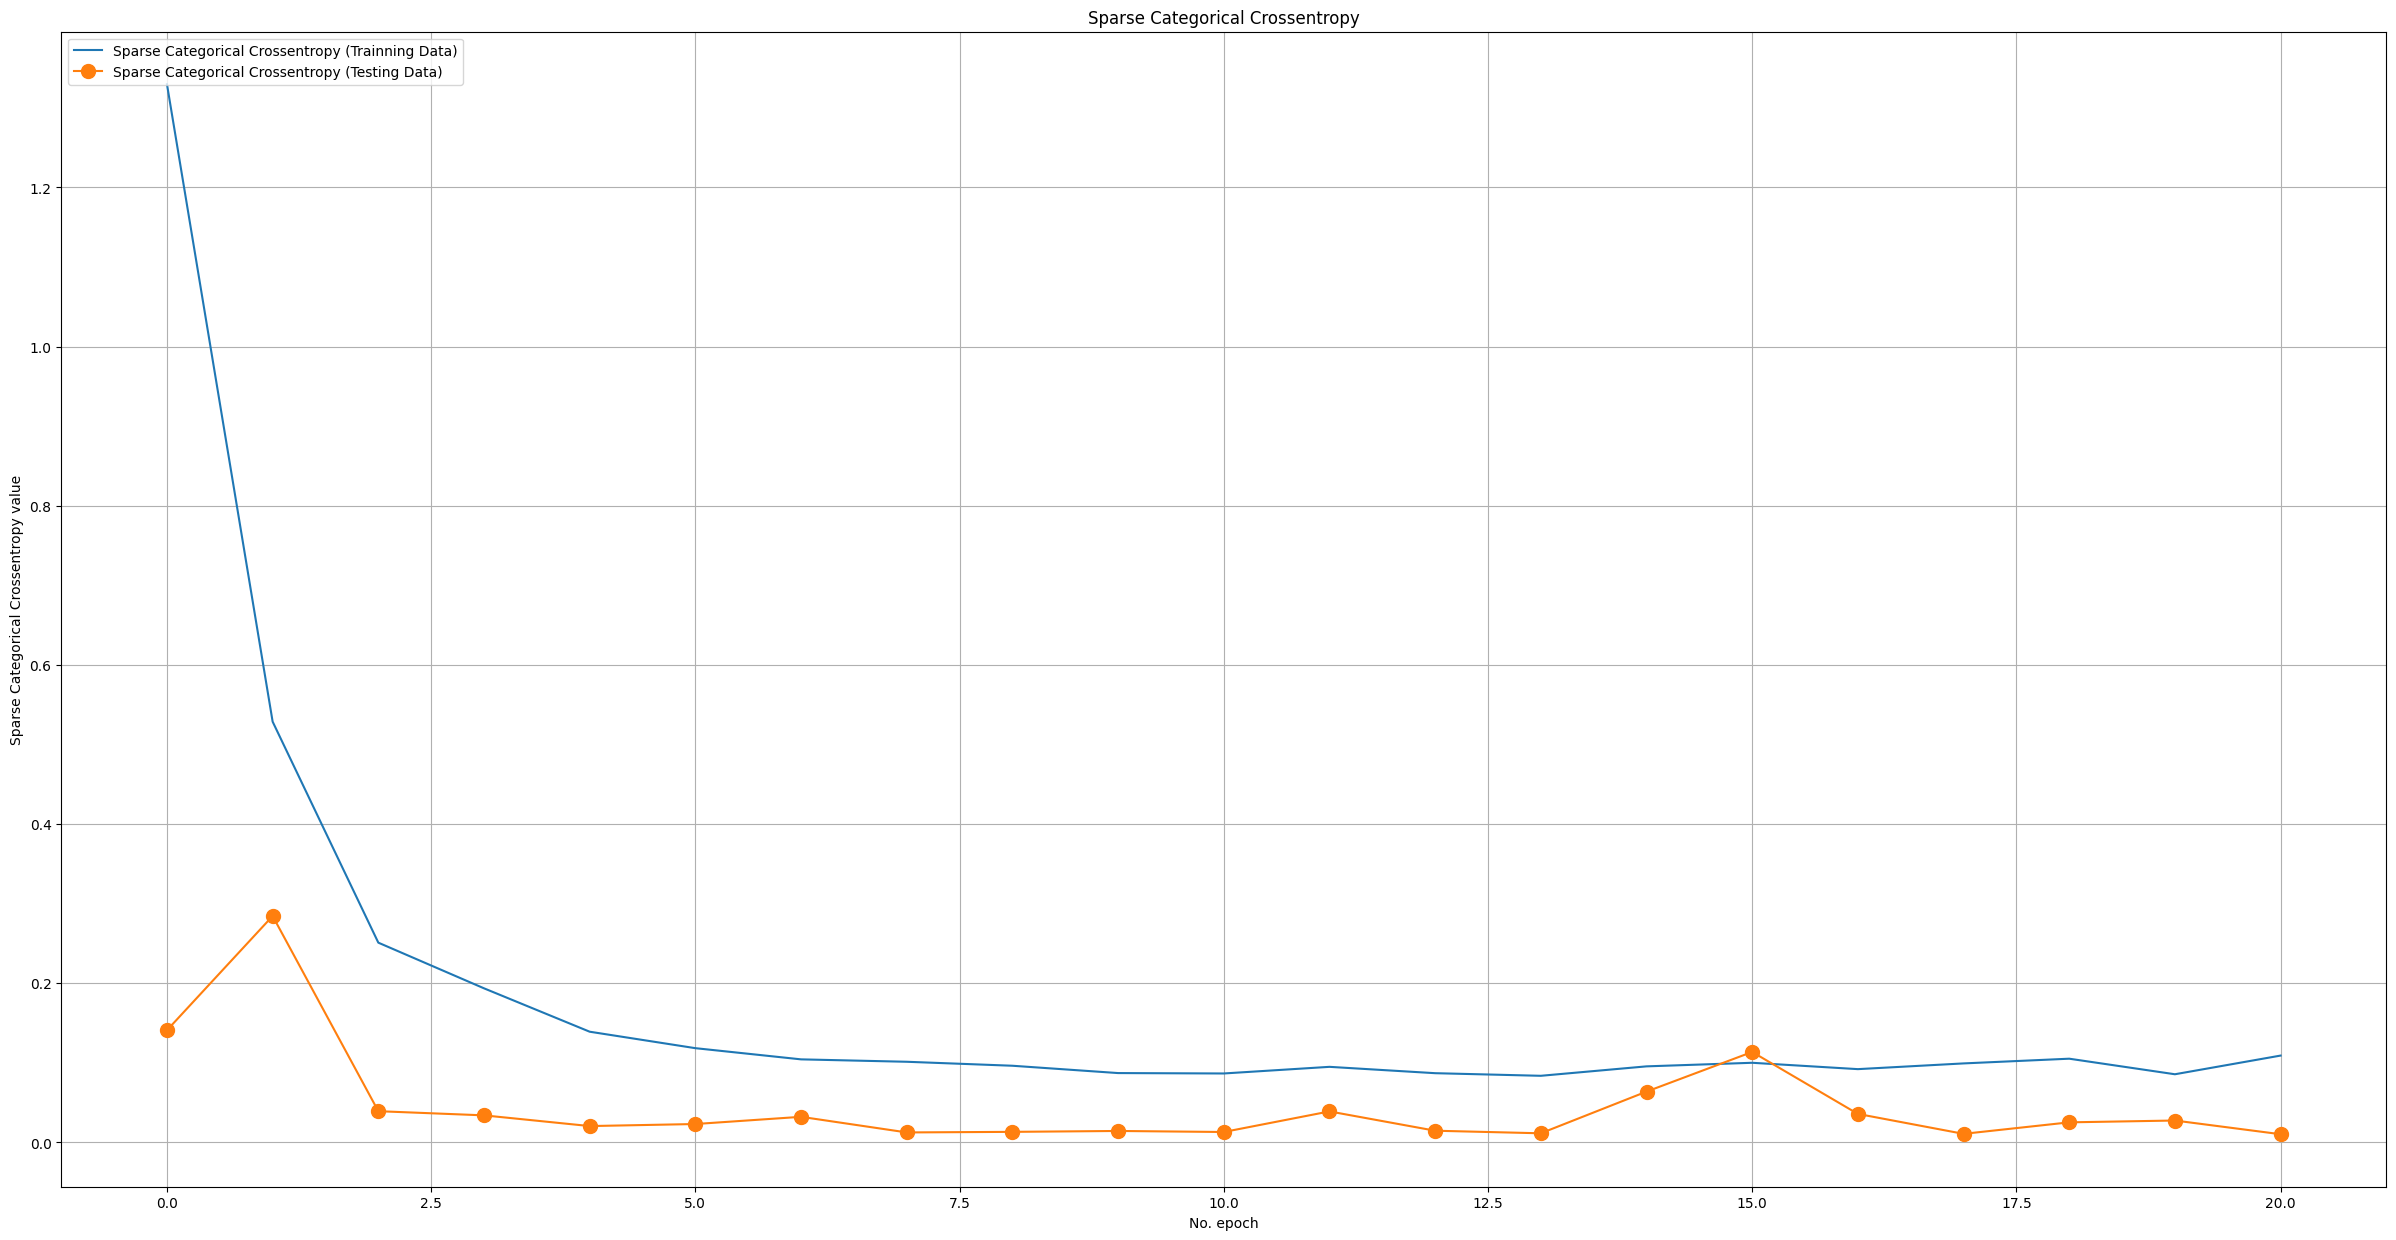

In [9]:
moStressNeuralNetwork.execute()

In [10]:
evaluator = EvaluateModel(
    moStressNeuralNetwork.model,
    moStressNeuralNetwork.modelFullName,
    { "features": moStressPreprocessing.featuresModelValidation, "targets": moStressPreprocessing.targetsModelValidation }
)

Evaluating MoStress with model: REGULARIZER-LSTM-RMSPROP

Classification Report

              precision    recall  f1-score   support

    Baseline     0.7053    0.6344    0.6679      8016
      Stress     0.7000    0.9186    0.7945      4523
   Amusement     0.3612    0.2707    0.3095      2423

    accuracy                         0.6614     14962
   macro avg     0.5888    0.6079    0.5907     14962
weighted avg     0.6480    0.6614    0.6482     14962



Confusion Matrix



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


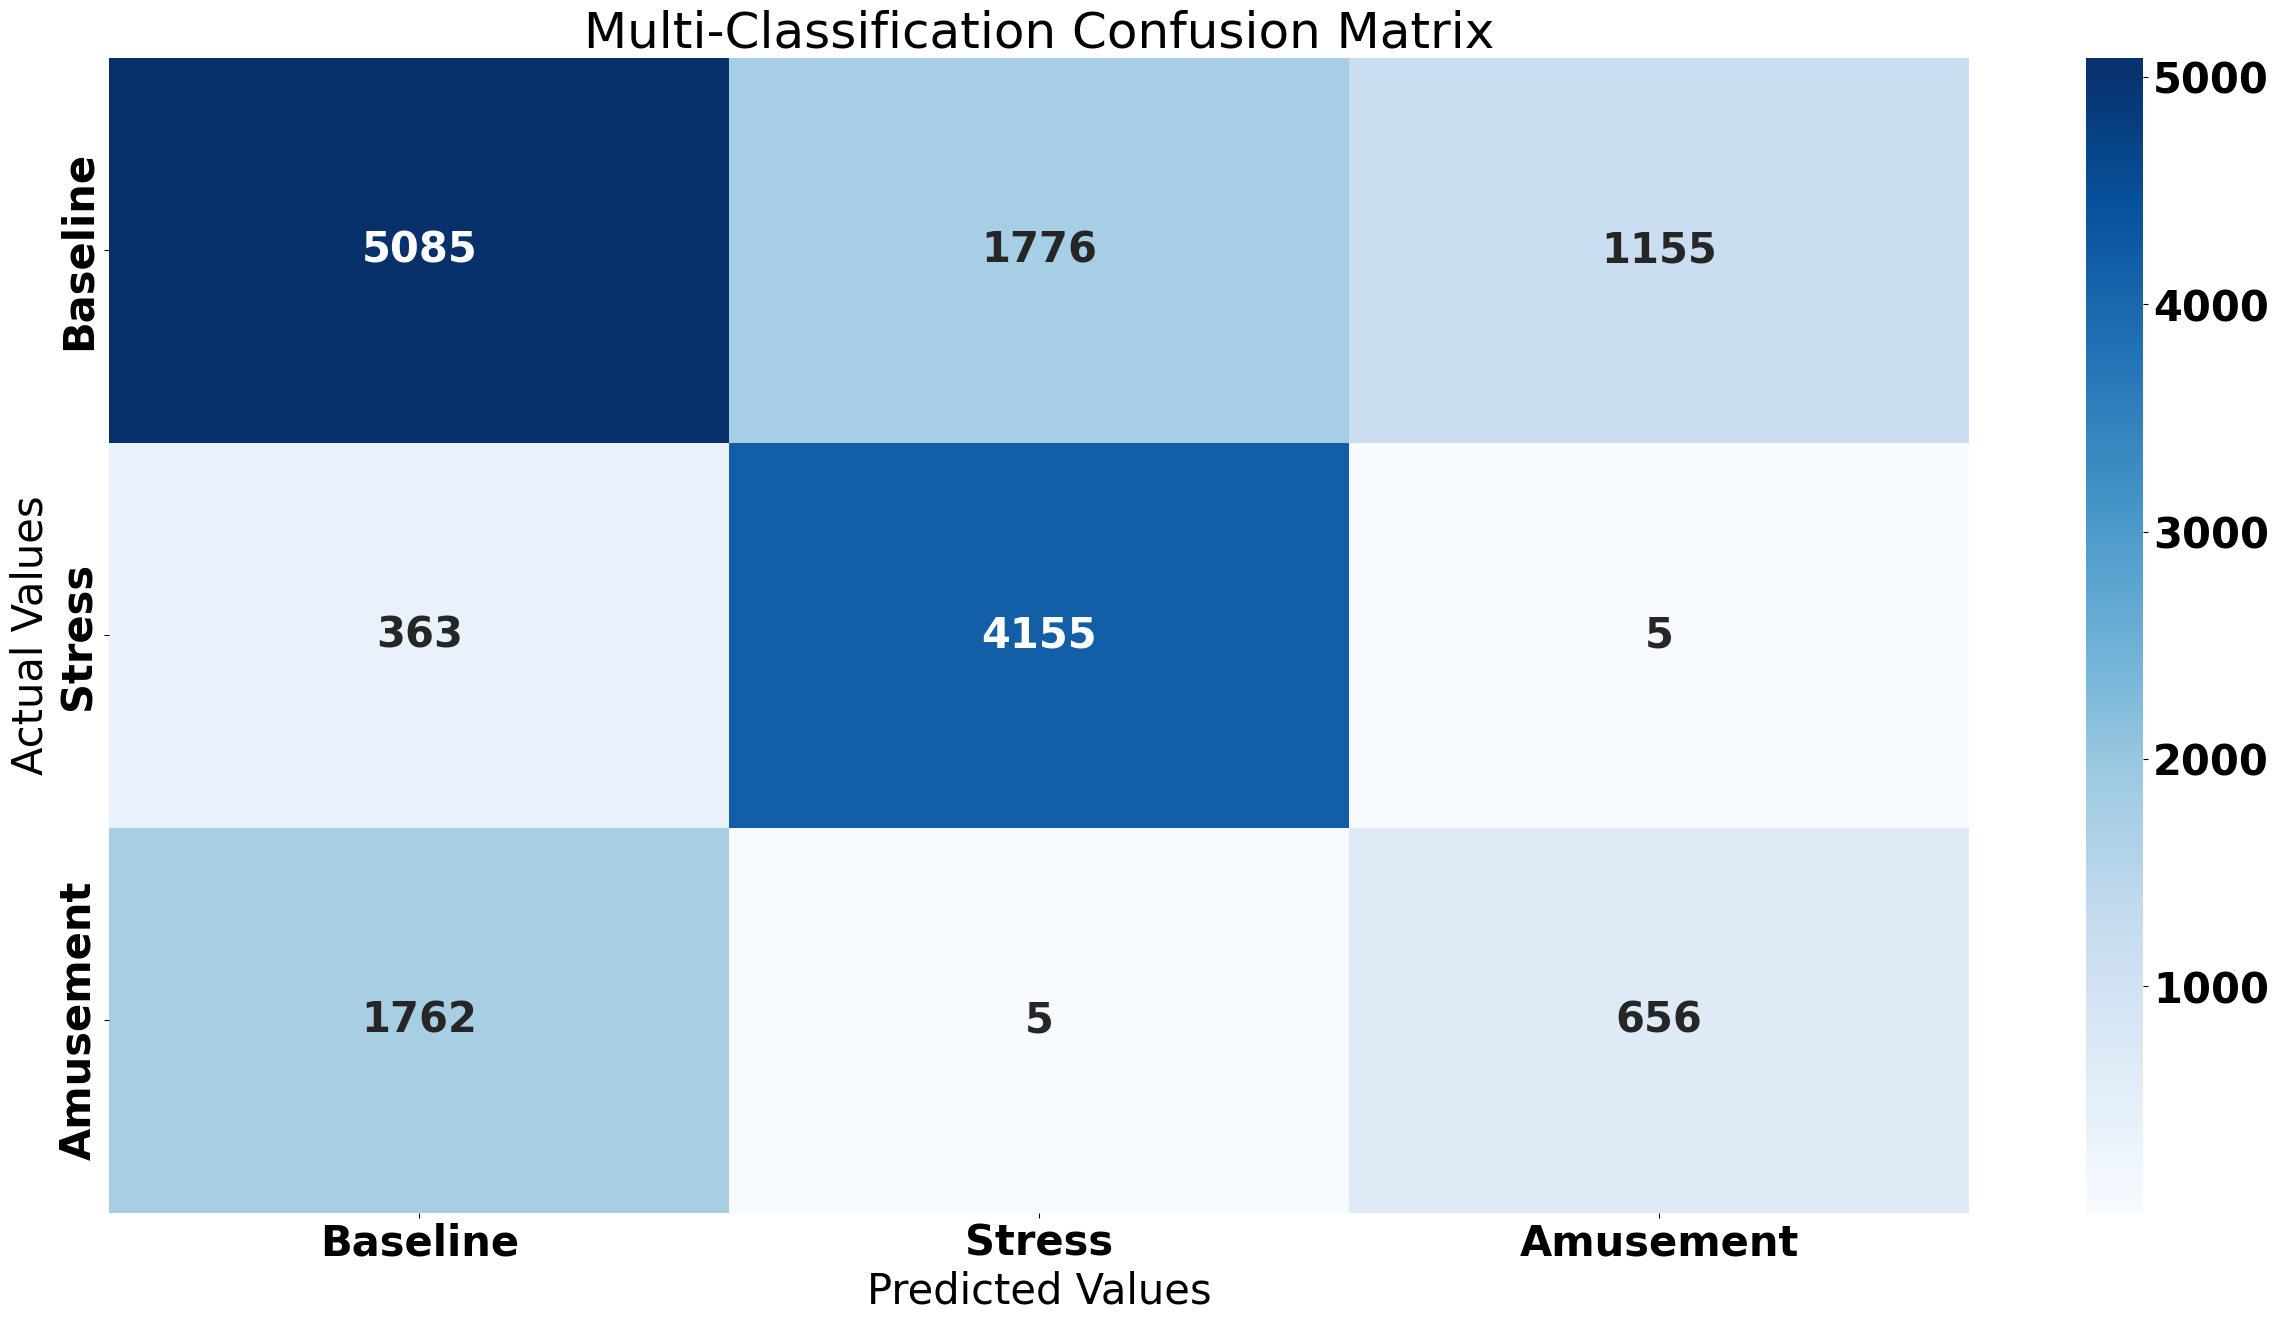

In [11]:
evaluator.executeEvaluation()